# **Examen de certificación – Intento 1**

#### **Instrucciones para examen**

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de precios de casas. Utilizaremos el «House Prices Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

#### **Contexto y Descripción del Dataset**

El «House Prices Dataset» contiene datos sobre diversas características de casas residenciales en Ames, Iowa. La tarea es predecir el precio final de cada casa (variable objetivo) en función de sus características.

#### **Requisitos**

1. **Limpieza de Datos:**
* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

2. **Exploración de Datos:**
* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

3. **Implementación de Modelos:**
* **Modelos de Regresión:** Implementa modelos de Linear Regression y LightGBM (LGBM).
* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
* **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

#### **Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

* Proceso completo de limpieza y preprocesamiento de datos.
* Visualizaciones y estadísticas descriptivas.
* Implementación y evaluación de los modelos de regresión.
* Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

#### **Consideraciones Éticas y Tecnológicas**

**Consideraciones Éticas:**

* **Transparencia y Reproducibilidad:** Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
* **Imparcialidad y Sesgo:** Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

* **Herramientas Utilizadas:** Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
* **Escalabilidad:** Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
* **Optimización de Modelos:** Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

### **EDA**

Cargamos el dataset

In [2]:
data = pd.read_csv('../Data/HousePrices/train.csv')
data.shape

(1460, 81)

Eliminamos la columna 'Id' porque no aporta nada.

In [3]:
data.drop(columns=['Id'], inplace=True)


Verificamos si hay duplicados

In [4]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


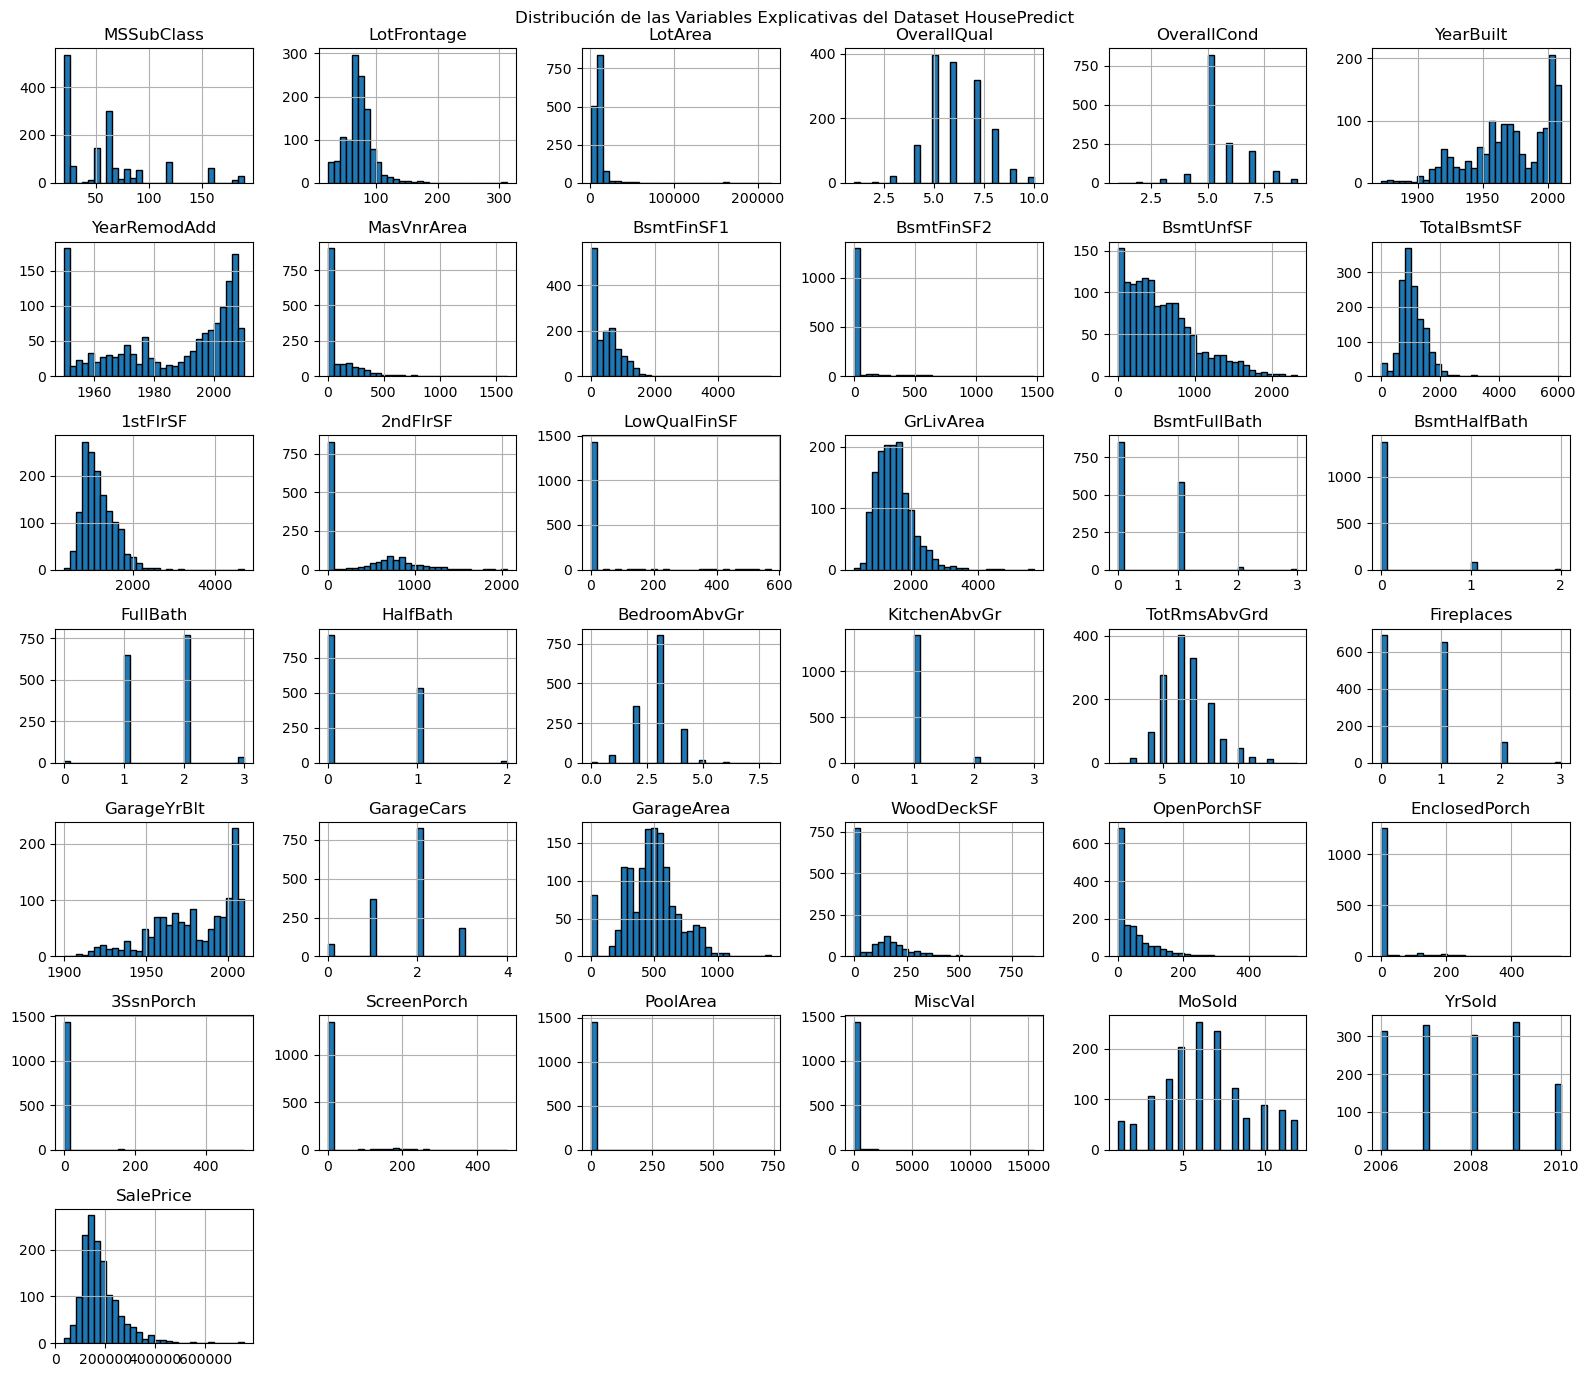

In [5]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(16, 14), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset HousePredict')
plt.tight_layout()
plt.show()

Seleccionamos las columnas numericas y Categoricas para trabajar mejor

In [6]:
# Seleccionar las columnas categoricas
categorical_features = data.select_dtypes(include=['object', 'category', 'bool'])
# Seleccionar las columnas numéricas
numeric_features = data.select_dtypes(include=[np.number])

#### **Consistencia en Valores Categoricos**

In [7]:
data_dict_category = {
    'MSZoning': 'category',
    'Street': 'category',
    'Alley': 'category',
    'LotShape': 'category',
    'LandContour': 'category',
    'Utilities': 'category',
    'LotConfig': 'category',
    'LandSlope': 'category',
    'Neighborhood': 'category',
    'Condition1': 'category',
    'Condition2': 'category',
    'BldgType': 'category',
    'HouseStyle': 'category',
    'RoofStyle': 'category',
    'RoofMatl': 'category',
    'Exterior1st': 'category',
    'Exterior2nd': 'category',
    'MasVnrType': 'category',
    'ExterQual': 'category',
    'ExterCond': 'category',
    'Foundation': 'category',
    'BsmtQual': 'category',
    'BsmtCond': 'category',
    'BsmtExposure': 'category',
    'BsmtFinType1': 'category',
    'BsmtFinType2': 'category',    
    'Heating': 'category',
    'HeatingQC': 'category',
    'CentralAir': 'bool',
    'Electrical': 'category',
    'KitchenQual': 'category',
    'Functional': 'category',
    'FireplaceQu': 'category',
    'GarageType': 'category',
    'GarageFinish': 'category',
    'GarageQual': 'category',    
    'GarageCond': 'category',
    'PavedDrive': 'category',
    'PoolQC': 'category',
    'Fence': 'category',
    'MiscFeature': 'category',
    'SaleType': 'category',
    'SaleCondition': 'category'

}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_category.items():
    categorical_features[column] = categorical_features[column].astype(dtype, errors='ignore')
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   Alley          91 non-null     category
 3   LotShape       1460 non-null   category
 4   LandContour    1460 non-null   category
 5   Utilities      1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  RoofStyle      1460 non-null   category
 14  RoofMatl       1460 non-null   category
 15  Exterior1st    1460 non-null   category
 16  Exterior2nd    1460 non-null   category
 17  MasVnrType     588 non-null    ca

Limpiamos las columnas categoricas para evitar inconvenientes

In [8]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_features:
    categorical_features[col] = categorical_features[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in categorical_features:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(categorical_features[col].unique())


Valores únicos después de limpieza en 'MSZoning':
['rl', 'rm', 'c', 'fv', 'rh']
Categories (5, object): ['c', 'fv', 'rh', 'rl', 'rm']

Valores únicos después de limpieza en 'Street':
['pave', 'grvl']
Categories (2, object): ['grvl', 'pave']

Valores únicos después de limpieza en 'Alley':
[NaN, 'grvl', 'pave']
Categories (2, object): ['grvl', 'pave']

Valores únicos después de limpieza en 'LotShape':
['reg' 'ir']

Valores únicos después de limpieza en 'LandContour':
['lvl', 'bnk', 'low', 'hls']
Categories (4, object): ['bnk', 'hls', 'low', 'lvl']

Valores únicos después de limpieza en 'Utilities':
['allpub', 'nosewa']
Categories (2, object): ['allpub', 'nosewa']

Valores únicos después de limpieza en 'LotConfig':
['inside' 'fr' 'corner' 'culdsac']

Valores únicos después de limpieza en 'LandSlope':
['gtl', 'mod', 'sev']
Categories (3, object): ['gtl', 'mod', 'sev']

Valores únicos después de limpieza en 'Neighborhood':
['collgcr', 'veenker', 'crawfor', 'noridge', 'mitchel', ..., 'npkvi

Validamos todas las columnas categoricas para ver si estan correctas

In [9]:
# Ejecutar la validación
mismatches = utils.validar_tipos(categorical_features, data_dict_category)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'LotShape': Tipo actual -> object, Tipo esperado -> category
- Columna 'LotConfig': Tipo actual -> object, Tipo esperado -> category
- Columna 'HouseStyle': Tipo actual -> object, Tipo esperado -> category
- Columna 'Functional': Tipo actual -> object, Tipo esperado -> category


Verificamos cuales son las que tiene problemas

In [10]:
print(categorical_features.LotShape.unique())
print(categorical_features.LotConfig.unique())
print(categorical_features.HouseStyle.unique())
print(categorical_features.Functional.unique())

['reg' 'ir']
['inside' 'fr' 'corner' 'culdsac']
['story' 'fin' 'unf' 'sfoyer' 'slvl']
['typ' 'min' 'maj' 'mod' 'sev']


Cambiamos las columnas que tuvieron problemas por sus dtypes correspondientes

In [11]:
categorical_features['LotShape'] = categorical_features['LotShape'].astype('category')
categorical_features['LotConfig'] = categorical_features['LotConfig'].astype('category')
categorical_features['HouseStyle'] = categorical_features['HouseStyle'].astype('category')
categorical_features['Functional'] = categorical_features['Functional'].astype('category')


Verificamos

In [12]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   Alley          91 non-null     category
 3   LotShape       1460 non-null   category
 4   LandContour    1460 non-null   category
 5   Utilities      1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  RoofStyle      1460 non-null   category
 14  RoofMatl       1460 non-null   category
 15  Exterior1st    1460 non-null   category
 16  Exterior2nd    1460 non-null   category
 17  MasVnrType     588 non-null    ca

Calculamos Na en las columnas categoricas

In [13]:
utils.calculate_na_statistics(categorical_features)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
FireplaceQu,770,690,47.26
GarageType,1379,81,5.55
GarageCond,1379,81,5.55
GarageQual,1379,81,5.55
GarageFinish,1379,81,5.55


Despues de analizar las variables con NA decidimos no eliminarlos y imputarlas por NA

In [14]:
# Iterar sobre las columnas categóricas para agregar la categoría 'NA' y rellenar NaN con 'NA'
for col in categorical_features.columns:
    if isinstance(categorical_features[col].dtype, pd.CategoricalDtype):
        # Agregar la categoría 'NA' si no está presente
        categorical_features[col] = categorical_features[col].cat.add_categories('NA')
        # Reemplazar NaN con 'NA'
        categorical_features[col] = categorical_features[col].fillna('NA')


Volvemos a verificar

In [15]:
utils.calculate_na_statistics(categorical_features)

,datos sin NAs en q,Na en q,Na en %
MSZoning,1460,0,0.0
FireplaceQu,1460,0,0.0
BsmtFinType1,1460,0,0.0
BsmtFinType2,1460,0,0.0
Heating,1460,0,0.0
HeatingQC,1460,0,0.0
CentralAir,1460,0,0.0
Electrical,1460,0,0.0
KitchenQual,1460,0,0.0
Functional,1460,0,0.0


#### **Consistencia en valores numericos**

Calculamos los NA en las columnas numericas

In [16]:
#Calculamos los Nan y sus porcentajes
utils.calculate_na_statistics(numeric_features)

,datos sin NAs en q,Na en q,Na en %
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
MasVnrArea,1452,8,0.55
OpenPorchSF,1460,0,0.00
KitchenAbvGr,1460,0,0.00
TotRmsAbvGrd,1460,0,0.00
Fireplaces,1460,0,0.00
GarageCars,1460,0,0.00
GarageArea,1460,0,0.00
WoodDeckSF,1460,0,0.00


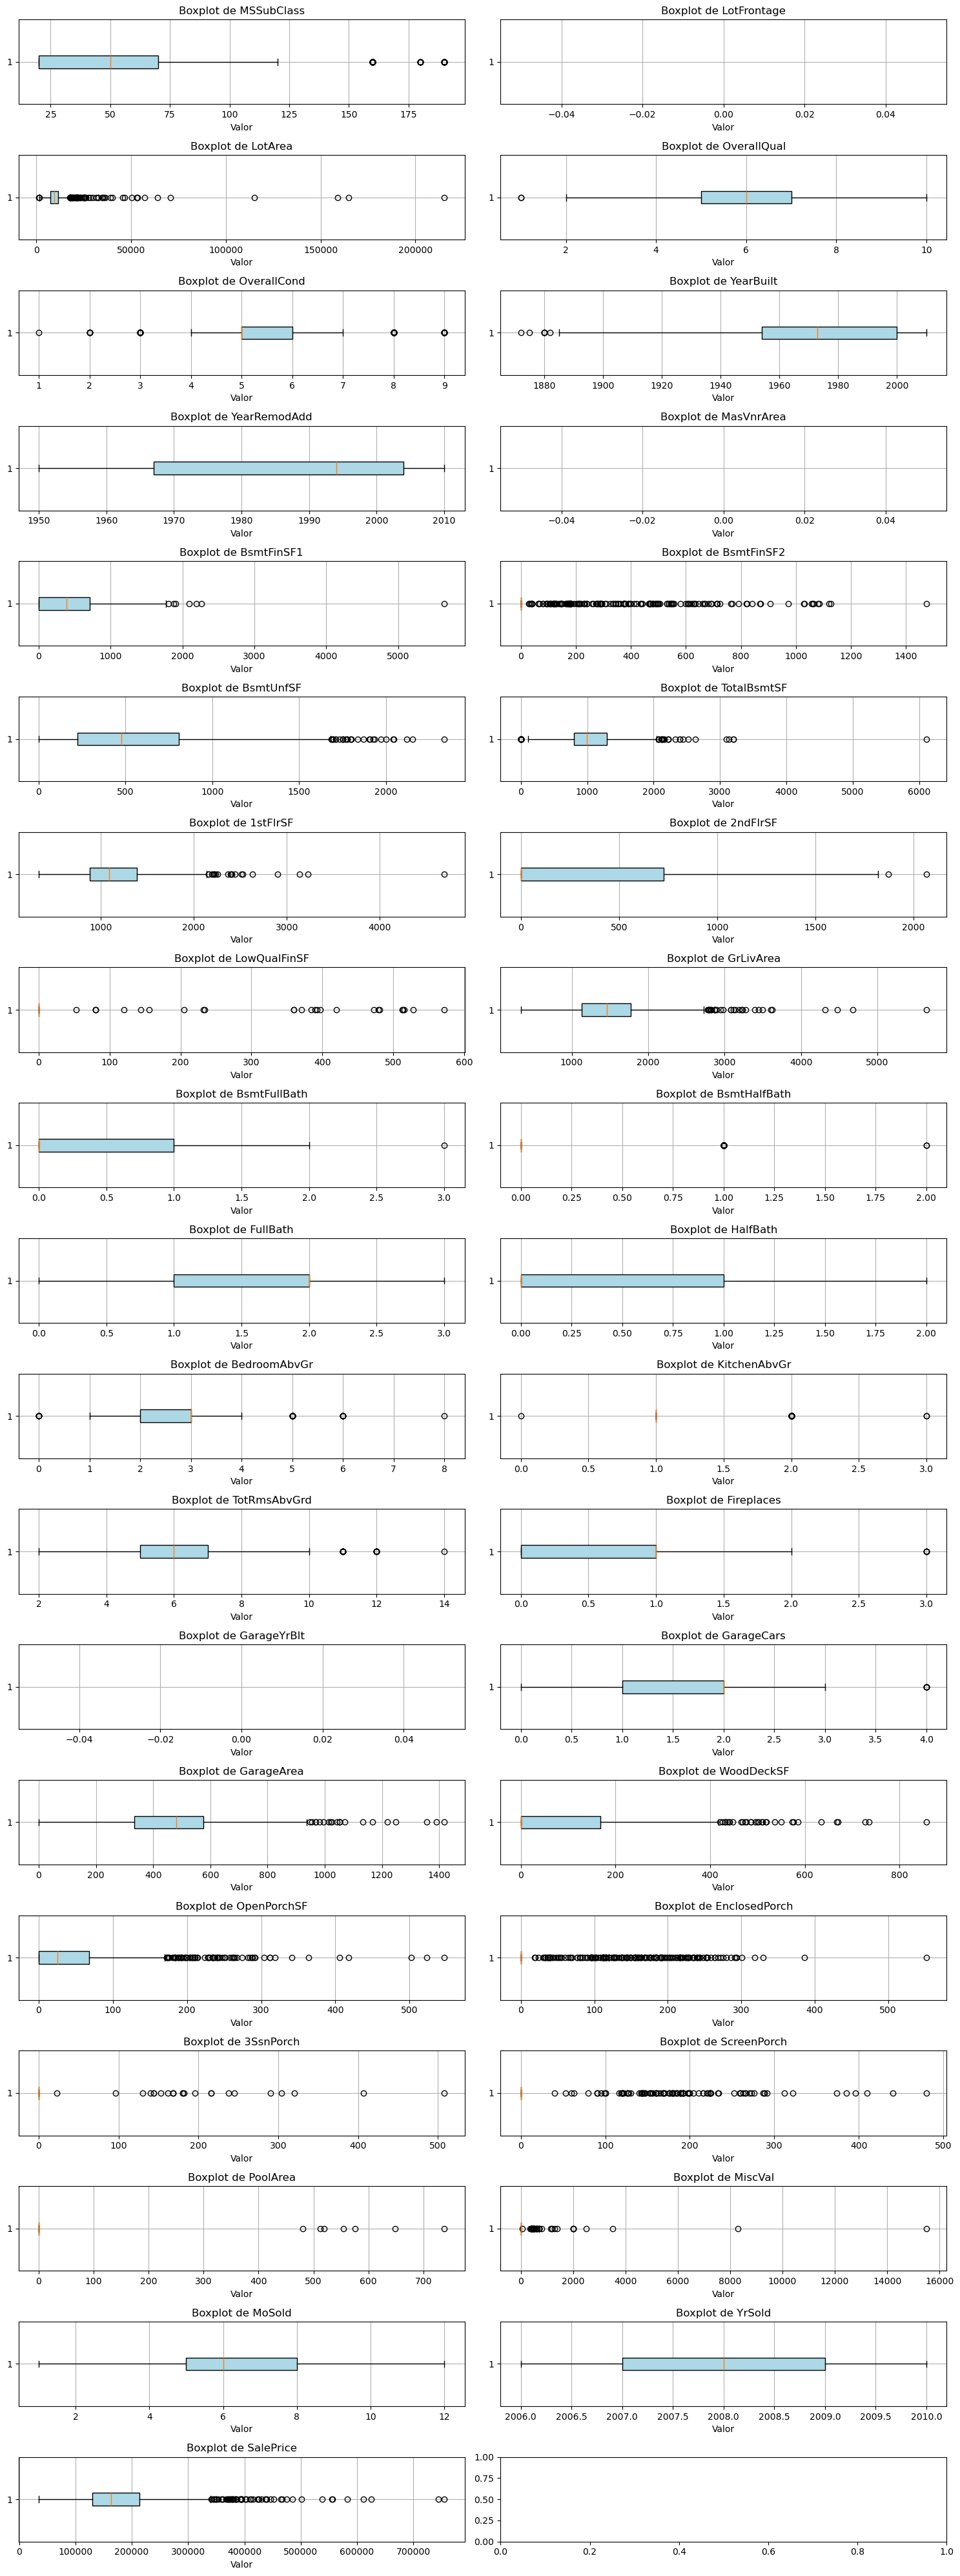

In [17]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(15, 40))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(numeric_features.columns):
    axes[i].boxplot(numeric_features[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [18]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
MSSubClass,103.0,7.054795,20.0,120.0
LotFrontage,88.0,6.027397,30.0,111.0
LotArea,69.0,4.726027,1491.0,17671.0
OverallQual,2.0,0.136986,2.0,10.0
OverallCond,125.0,8.561644,4.0,7.0
YearBuilt,7.0,0.479452,1885.0,2010.0
YearRemodAdd,0.0,0.000000,1950.0,2010.0
MasVnrArea,96.0,6.575342,0.0,415.0
BsmtFinSF1,7.0,0.479452,0.0,1767.0
BsmtFinSF2,167.0,11.438356,0.0,0.0


Despues de analizar los boxplots y los porcentajes de outliers decido no eliminar nada

**Estadisticas Descriptivas de las Columnas Numericas**

In [19]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numeric_features:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
MSSubClass,1460.0,56.90,50.0,42.30,20.0,190.0,20.00,70.00
LotFrontage,1201.0,70.05,69.0,24.28,21.0,313.0,59.00,80.00
LotArea,1460.0,10516.83,9478.5,9981.26,1300.0,215245.0,7553.50,11601.50
OverallQual,1460.0,6.10,6.0,1.38,1.0,10.0,5.00,7.00
OverallCond,1460.0,5.58,5.0,1.11,1.0,9.0,5.00,6.00
YearBuilt,1460.0,1971.27,1973.0,30.20,1872.0,2010.0,1954.00,2000.00
YearRemodAdd,1460.0,1984.87,1994.0,20.65,1950.0,2010.0,1967.00,2004.00
MasVnrArea,1452.0,103.69,0.0,181.07,0.0,1600.0,0.00,166.00
BsmtFinSF1,1460.0,443.64,383.5,456.10,0.0,5644.0,0.00,712.25
BsmtFinSF2,1460.0,46.55,0.0,161.32,0.0,1474.0,0.00,0.00


**Correlaciones de columnas numericas**

In [20]:
numeric_features.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


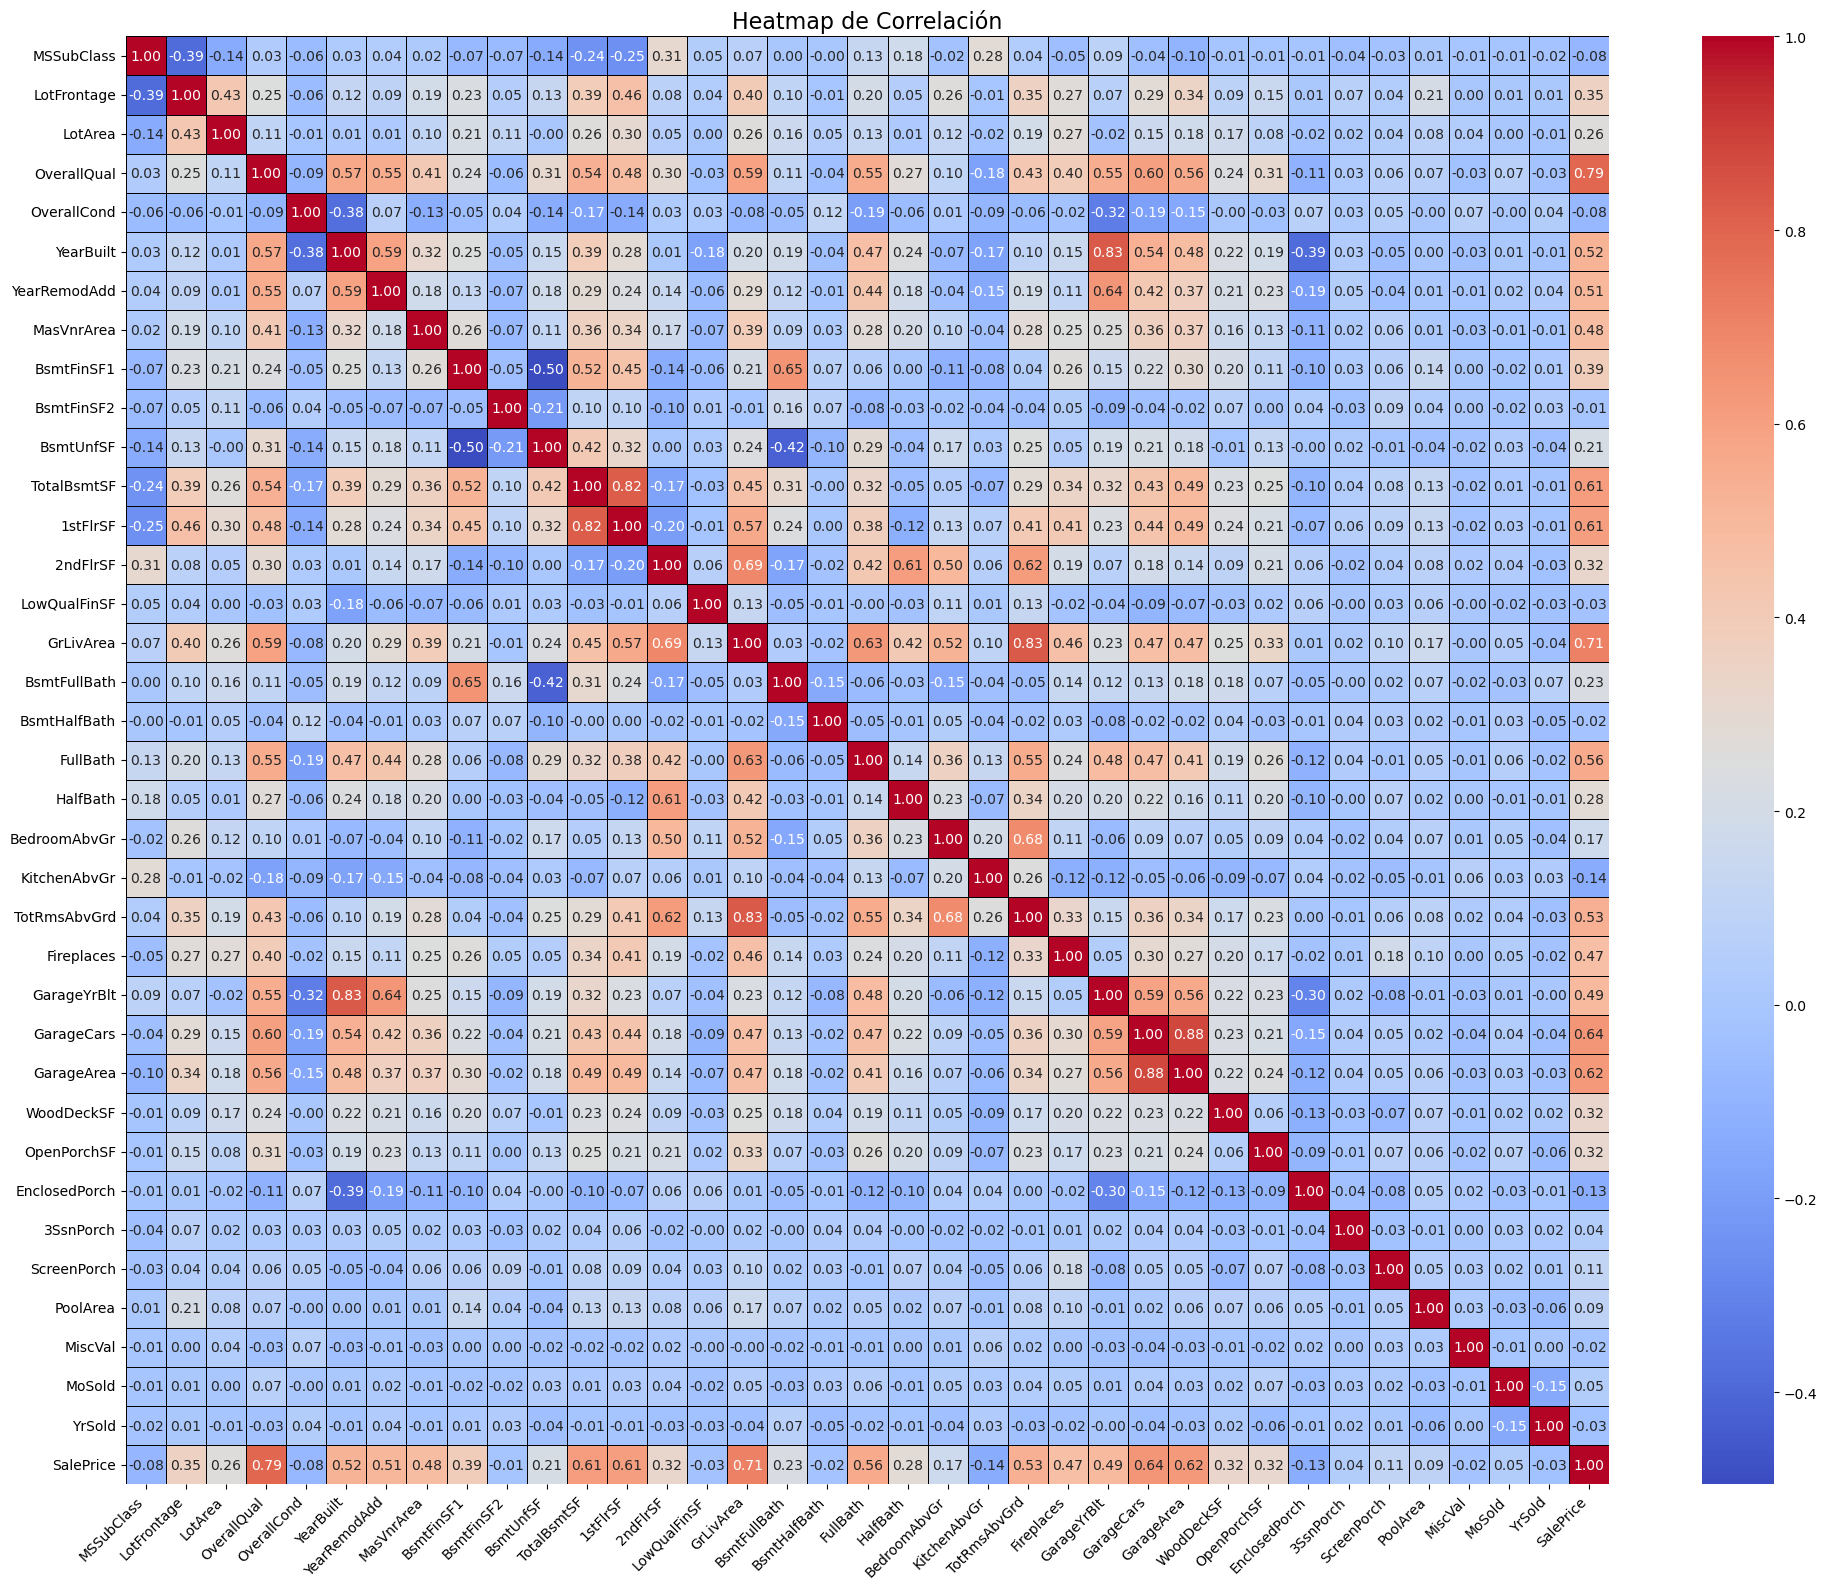

In [21]:
# Crear la figura y el heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_features.corr(), annot=True  ,fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')

# Agregar título y ajustar el diseño
plt.title('Heatmap de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.tight_layout
plt.show()

Text(0, 0.5, 'Features')

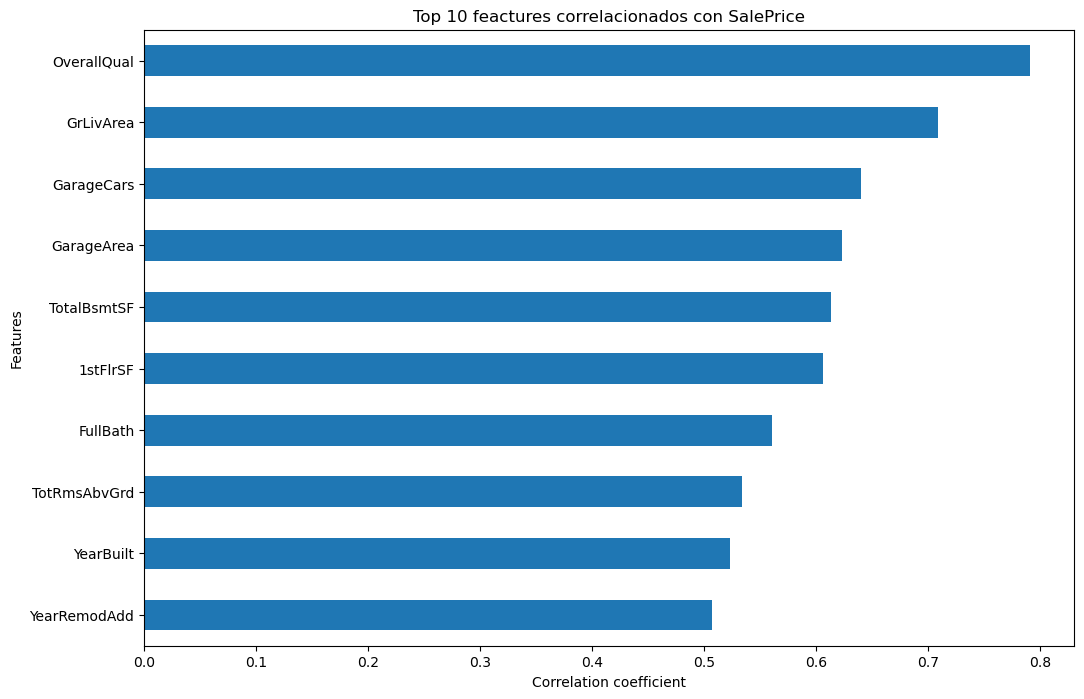

In [22]:
plt.figure(figsize=(12, 8))
numeric_features.corr().SalePrice.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh') 
plt.title("Top 10 feactures correlacionados con SalePrice")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

#### **Modeling**

Cargamos el dataset limpio en una nueva variable

In [23]:
data = pd.concat([numeric_features, categorical_features], axis=1)


Duplicamos esa variable para tener mejor control

In [24]:
data2=data.copy()
data2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,attchd,rfn,ta,ta,y,NA,NA,NA,wd,normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,attchd,rfn,ta,ta,y,NA,NA,NA,wd,normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,attchd,rfn,ta,ta,y,NA,NA,NA,wd,normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,detchd,unf,ta,ta,y,NA,NA,NA,wd,abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,attchd,rfn,ta,ta,y,NA,NA,NA,wd,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,attchd,rfn,ta,ta,y,NA,NA,NA,wd,normal
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,attchd,unf,ta,ta,y,NA,mnprv,NA,wd,normal
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,attchd,rfn,ta,ta,y,NA,gdprv,shed,wd,normal
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,attchd,unf,ta,ta,y,NA,NA,NA,wd,normal


Seleccionamos Feactures

In [25]:
numerical_cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]

categorical_cols = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
    'SaleCondition'
]

Dividimos en X, y

In [26]:
X, y = data2.drop('SalePrice', axis=1), data2['SalePrice']

#### **REGRESSION LINEAL**

In [27]:
# Eliminar filas con valores faltantes
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Dividir el conjunto limpio en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Crear el preprocesador sin imputación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Modelo de regresión lineal
])

# Ajustar el pipeline al conjunto de entrenamiento limpio
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de la evaluación
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2386523623.3472104
R-squared: 0.697422783911184


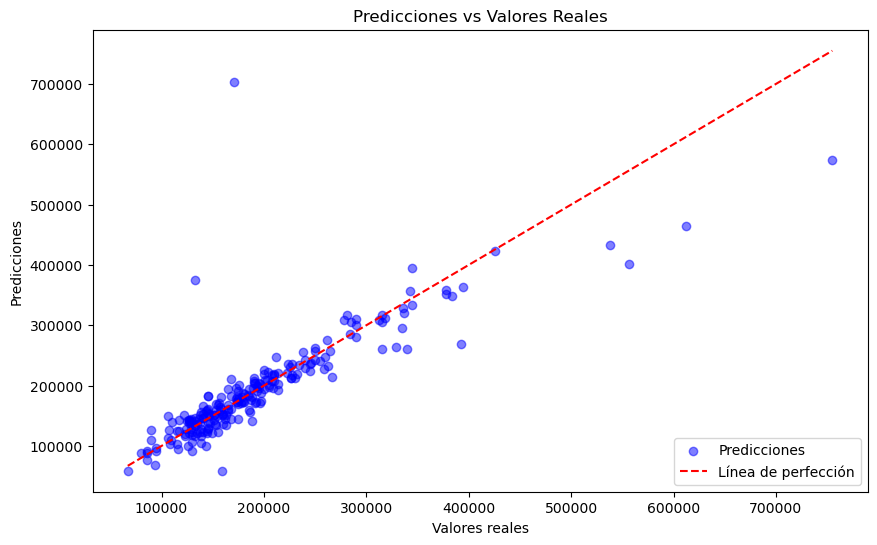

In [28]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatterplot de valores reales vs predicciones
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de perfección')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

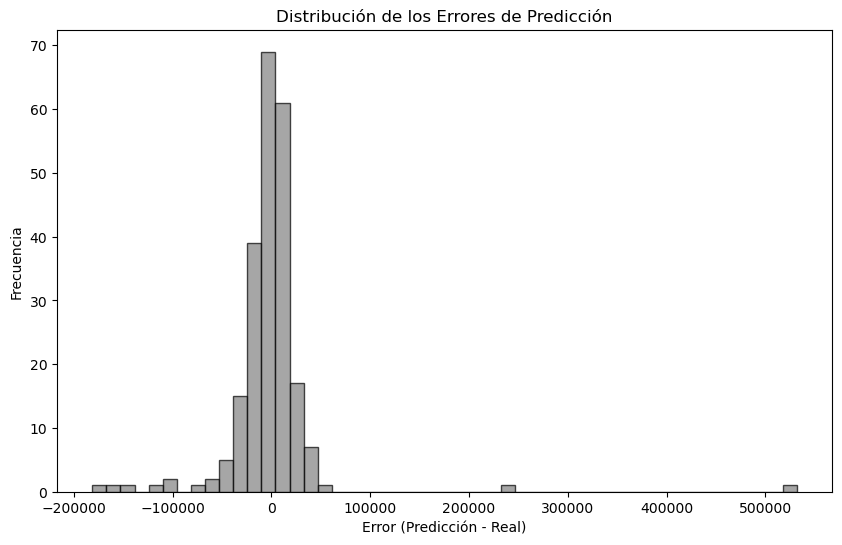

In [29]:
# Calcular los errores
errors = y_pred - y_test

# Graficar el histograma de los errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='gray', edgecolor='black', alpha=0.7)
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Error (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.show()

#### **KNN**

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores faltantes
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Dividir el conjunto limpio en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Crear el preprocesador sin imputación
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Crear el pipeline con preprocesamiento y modelo
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())  # Modelo de KNN
])

# Ajustar el pipeline al conjunto de entrenamiento limpio
pipeline_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el rendimiento del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Imprimir los resultados de la evaluación
print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")


KNN Mean Squared Error: 1642554439.675911
KNN R-squared: 0.7917474837586576


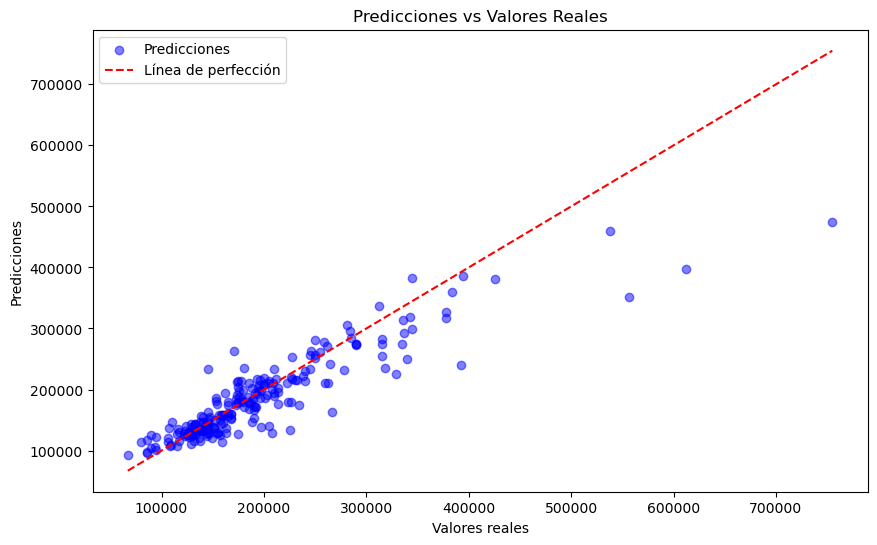

In [31]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatterplot de valores reales vs predicciones
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de perfección')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

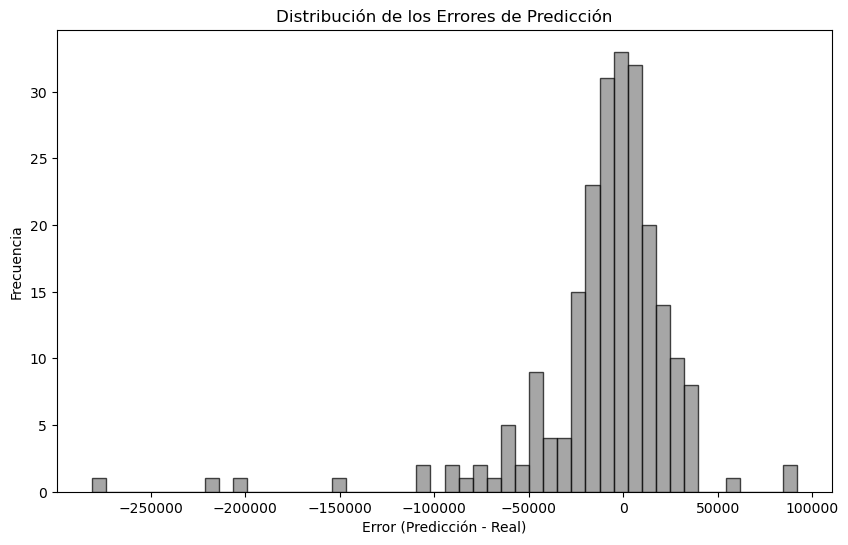

In [32]:
# Calcular los errores
errors = y_pred_knn - y_test

# Graficar el histograma de los errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='gray', edgecolor='black', alpha=0.7)
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Error (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.show()

#### **LGBM**

In [33]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores faltantes
X_clean = X.dropna()
y_clean = y[X_clean.index]

# Dividir el conjunto limpio en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Crear el preprocesador sin imputación
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Crear el pipeline con preprocesamiento y modelo
pipeline_lgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor())  # Modelo LightGBM
])

# Ajustar el pipeline al conjunto de entrenamiento limpio
pipeline_lgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lgb = pipeline_lgb.predict(X_test)

# Evaluar el rendimiento del modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Imprimir los resultados de la evaluación
print(f"LightGBM Mean Squared Error: {mse_lgb}")
print(f"LightGBM R-squared: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 167
[LightGBM] [Info] Start training from score 183339.549107
LightGBM Mean Squared Error: 1095717498.4940038
LightGBM R-squared: 0.8610786220296793


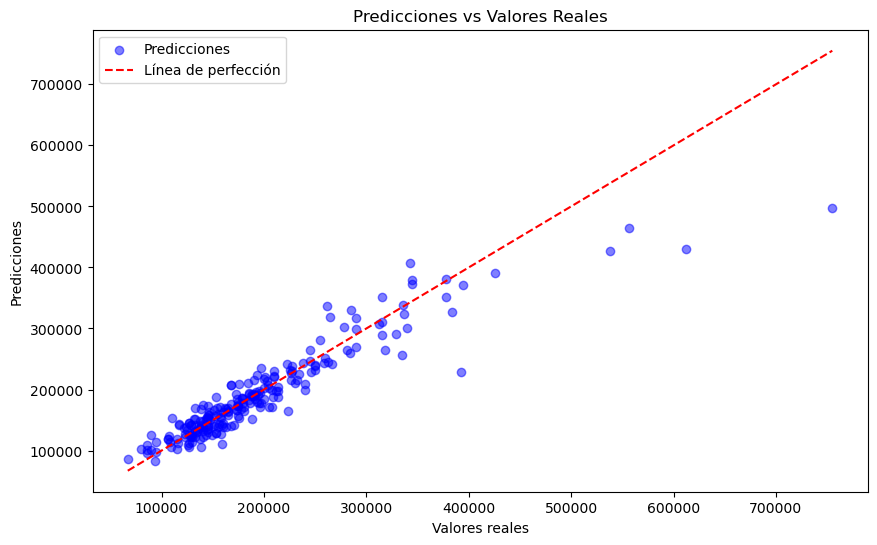

In [34]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatterplot de valores reales vs predicciones
plt.scatter(y_test, y_pred_lgb, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de perfección')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

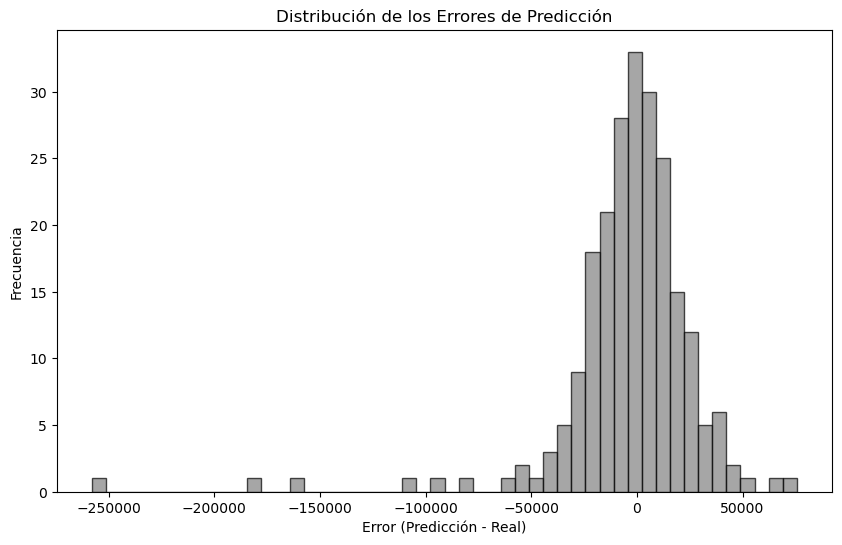

In [35]:
# Calcular los errores
errors = y_pred_lgb - y_test

# Graficar el histograma de los errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='gray', edgecolor='black', alpha=0.7)
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Error (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.show()

#### **Consideraciones de los modelos**

La Regresión Lineal (RL) muestra un rendimiento moderado con un Mean Squared Error (MSE) de 2.39 mil millones y un R-squared de 0.697. Esto significa que el modelo puede explicar el 69.7% de la variabilidad en los datos, lo cual es razonable, pero no excepcional para modelos con relaciones más complejas.

El modelo K-Nearest Neighbors (KNN) mejora el rendimiento con un MSE de 1.64 mil millones y un R-squared de 0.792, indicando que puede explicar el 79.2% de la variabilidad. Esto sugiere que KNN es más capaz de identificar patrones no lineales y relaciones más complejas en los datos en comparación con la regresión lineal.

Por otro lado, LightGBM ofrece el mejor rendimiento de los tres modelos, con un MSE de 1.09 mil millones y un R-squared de 0.861. Esto significa que LightGBM explica el 86.1% de la variabilidad, superando tanto a RL como a KNN en términos de precisión y capacidad para manejar datos complejos.